# FINAL PROJECT GROUP 10


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_addons as tfa
from scipy import ndimage
import logging

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)
print("Manny libraries READY")

2.15.0
Manny libraries READY


Defining Paths to Datasets

In [10]:
train_dir = "D:\\Bone Fracture Final Project\\train"
validation_dir = "D:\\Bone Fracture Final Project\\valid"
test_dir = "D:\\Bone Fracture Final Project\\test"


Data Preprocessing

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 3631 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


Testing Data Augmentation Functionality

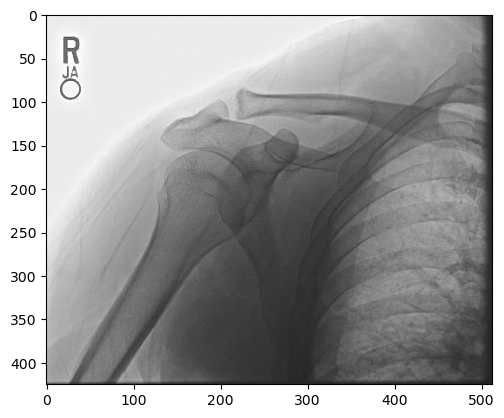

In [12]:
# Load a sample image
image_path = "D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg"
image = tf.keras.preprocessing.image.load_img(image_path)
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, 0) # Create a batch

# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
 layers.RandomFlip("horizontal_and_vertical"),
 layers.RandomRotation(0.2),
])

# Apply augmentations
augmented_images = data_augmentation(image)




# Load the image
img = Image.open("D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg")

# Normalize the image
img_normalized = np.array(img) / 255.0  # For integers
# or
img_normalized = np.array(img) / np.max(img)  # For floats

# Now you can display the normalized image
plt.imshow(img_normalized)
plt.show()



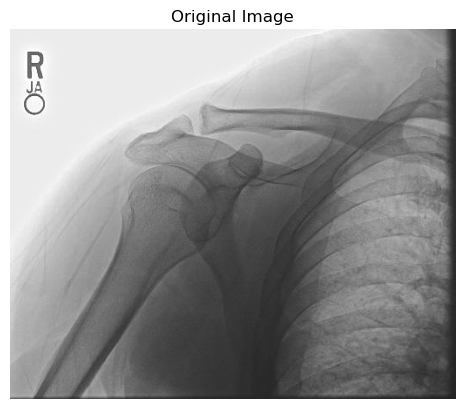

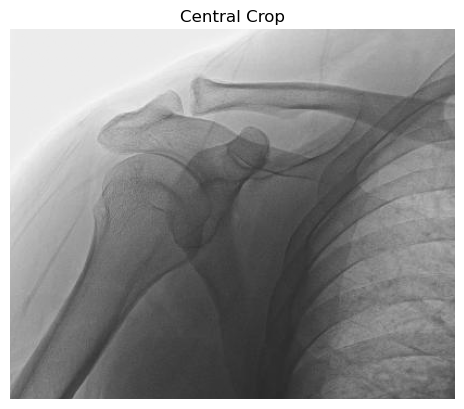

In [13]:
 #Load the image
image_path = "D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg"
image = tf.keras.preprocessing.image.load_img(image_path)
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, 0)  # Add a batch dimension

# Normalize the image
image_normalized = image / 255.0  # Normalize to [0, 1]

# Plot the normalized image
plt.imshow(image_normalized[0])  # Remove batch dimension before plotting
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define a central crop ratio
crop_ratio = 0.8

# Apply central crop
cropped_image = tf.image.central_crop(image[0], crop_ratio)  # Remove batch dimension before cropping

# Normalize the cropped image
cropped_image_normalized = cropped_image / 255.0  # Normalize to [0, 1]

# Plot the cropped image
plt.imshow(cropped_image_normalized)
plt.title('Central Crop')
plt.axis('off')
plt.show()

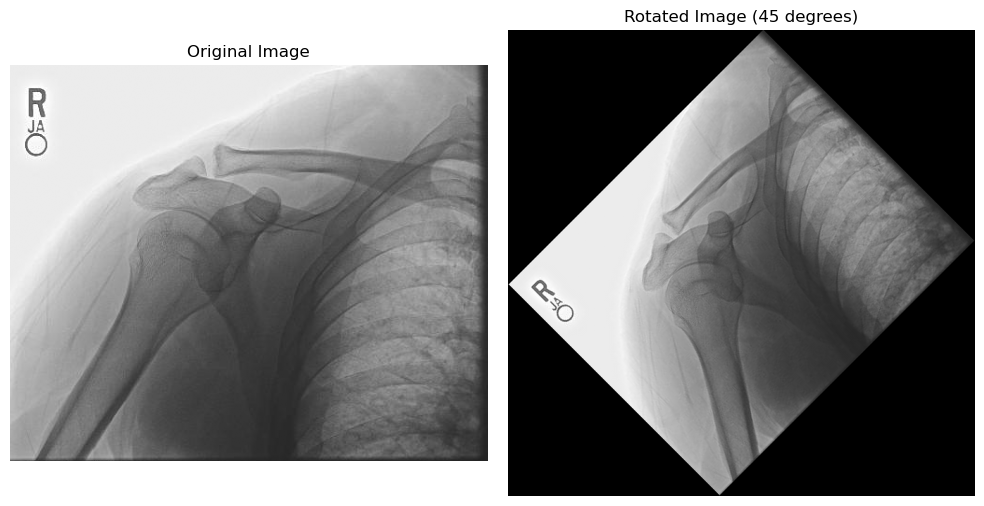

In [14]:
# Load the image
img = Image.open("D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg")

# Normalize the image
img_normalized = np.array(img) / 255.0 # For integers, normalize to [0, 1]

# Rotate the image by a specified angle (e.g., 45 degrees)
angle = 45 # Specify the angle in degrees
rotated_image = ndimage.rotate(img_normalized, angle)

# Ensure the data is in the correct range and type for display
rotated_image = np.clip(rotated_image, 0, 1) # Clip to [0, 1]
rotated_image = rotated_image.astype(np.float32) # Ensure it's a float array

# Display the original and rotated images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img_normalized, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Rotated image
axs[1].imshow(rotated_image, cmap='gray')
axs[1].set_title('Rotated Image (45 degrees)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


Model Building

In [15]:
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [16]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

base_model.trainable = False


Compiling the Model

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Training the Model

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=250,
    validation_data=validation_generator,
    validation_steps=5)


Epoch 1/250
10/10 [==============================] - 89s 6s/step - loss: 1.5984e-19 - accuracy: 1.0000 - val_loss: 1.4198e-35 - val_accuracy: 1.0000
Epoch 2/250
10/10 [==============================] - 37s 4s/step - loss: 1.7822e-19 - accuracy: 1.0000 - val_loss: 1.3218e-35 - val_accuracy: 1.0000
Epoch 3/250
10/10 [==============================] - 36s 4s/step - loss: 1.1722e-23 - accuracy: 1.0000 - val_loss: 1.1788e-35 - val_accuracy: 1.0000
Epoch 4/250
10/10 [==============================] - 36s 4s/step - loss: 7.1335e-24 - accuracy: 1.0000 - val_loss: 1.3318e-35 - val_accuracy: 1.0000
Epoch 5/250
10/10 [==============================] - 35s 3s/step - loss: 6.7995e-21 - accuracy: 1.0000 - val_loss: 1.3833e-35 - val_accuracy: 1.0000
Epoch 6/250
10/10 [==============================] - 36s 4s/step - loss: 1.8611e-19 - accuracy: 1.0000 - val_loss: 1.4481e-35 - val_accuracy: 1.0000
Epoch 7/250
10/10 [==============================] - 35s 4s/step - loss: 3.5174e-22 - accuracy: 1.0000 - v

Epoch 56/250
10/10 [==============================] - 34s 3s/step - loss: 1.1333e-19 - accuracy: 1.0000 - val_loss: 1.2241e-35 - val_accuracy: 1.0000
Epoch 57/250
10/10 [==============================] - 34s 3s/step - loss: 2.3909e-20 - accuracy: 1.0000 - val_loss: 1.3190e-35 - val_accuracy: 1.0000
Epoch 58/250
10/10 [==============================] - 34s 3s/step - loss: 4.4620e-23 - accuracy: 1.0000 - val_loss: 1.4477e-35 - val_accuracy: 1.0000
Epoch 59/250
10/10 [==============================] - 34s 3s/step - loss: 5.7745e-20 - accuracy: 1.0000 - val_loss: 1.1640e-35 - val_accuracy: 1.0000
Epoch 60/250
10/10 [==============================] - 35s 3s/step - loss: 2.4271e-22 - accuracy: 1.0000 - val_loss: 1.0489e-35 - val_accuracy: 1.0000
Epoch 61/250
10/10 [==============================] - 34s 3s/step - loss: 3.8486e-24 - accuracy: 1.0000 - val_loss: 1.4586e-35 - val_accuracy: 1.0000
Epoch 62/250
10/10 [==============================] - 34s 3s/step - loss: 7.4167e-23 - accuracy: 1.0

10/10 [==============================] - 34s 3s/step - loss: 7.9420e-23 - accuracy: 1.0000 - val_loss: 1.1687e-35 - val_accuracy: 1.0000
Epoch 111/250
10/10 [==============================] - 34s 3s/step - loss: 4.6907e-17 - accuracy: 1.0000 - val_loss: 1.4579e-35 - val_accuracy: 1.0000
Epoch 112/250
10/10 [==============================] - 34s 3s/step - loss: 1.0103e-21 - accuracy: 1.0000 - val_loss: 1.3695e-35 - val_accuracy: 1.0000
Epoch 113/250
10/10 [==============================] - 34s 3s/step - loss: 8.6884e-18 - accuracy: 1.0000 - val_loss: 1.2236e-35 - val_accuracy: 1.0000
Epoch 114/250
10/10 [==============================] - 34s 3s/step - loss: 1.2977e-21 - accuracy: 1.0000 - val_loss: 1.2578e-35 - val_accuracy: 1.0000
Epoch 115/250
10/10 [==============================] - 33s 3s/step - loss: 2.6956e-17 - accuracy: 1.0000 - val_loss: 1.1098e-35 - val_accuracy: 1.0000
Epoch 116/250
10/10 [==============================] - 33s 3s/step - loss: 8.9677e-20 - accuracy: 1.0000 - v

10/10 [==============================] - 32s 3s/step - loss: 6.1213e-20 - accuracy: 1.0000 - val_loss: 1.4329e-35 - val_accuracy: 1.0000
Epoch 165/250
10/10 [==============================] - 34s 3s/step - loss: 2.4216e-20 - accuracy: 1.0000 - val_loss: 1.4612e-35 - val_accuracy: 1.0000
Epoch 166/250
10/10 [==============================] - 34s 3s/step - loss: 6.2012e-16 - accuracy: 1.0000 - val_loss: 1.1232e-35 - val_accuracy: 1.0000
Epoch 167/250
10/10 [==============================] - 34s 3s/step - loss: 6.4729e-23 - accuracy: 1.0000 - val_loss: 1.1962e-35 - val_accuracy: 1.0000
Epoch 168/250
10/10 [==============================] - 34s 3s/step - loss: 3.1946e-22 - accuracy: 1.0000 - val_loss: 1.1342e-35 - val_accuracy: 1.0000
Epoch 169/250
10/10 [==============================] - 34s 3s/step - loss: 2.5124e-22 - accuracy: 1.0000 - val_loss: 1.3912e-35 - val_accuracy: 1.0000
Epoch 170/250
10/10 [==============================] - 33s 3s/step - loss: 6.3848e-19 - accuracy: 1.0000 - v

10/10 [==============================] - 34s 3s/step - loss: 4.7924e-24 - accuracy: 1.0000 - val_loss: 1.0984e-35 - val_accuracy: 1.0000
Epoch 219/250
10/10 [==============================] - 34s 3s/step - loss: 8.0182e-23 - accuracy: 1.0000 - val_loss: 1.1421e-35 - val_accuracy: 1.0000
Epoch 220/250
10/10 [==============================] - 34s 3s/step - loss: 4.5601e-24 - accuracy: 1.0000 - val_loss: 1.4760e-35 - val_accuracy: 1.0000
Epoch 221/250
10/10 [==============================] - 34s 3s/step - loss: 5.7694e-22 - accuracy: 1.0000 - val_loss: 1.4524e-35 - val_accuracy: 1.0000
Epoch 222/250
10/10 [==============================] - 35s 4s/step - loss: 3.9178e-19 - accuracy: 1.0000 - val_loss: 1.5278e-35 - val_accuracy: 1.0000
Epoch 223/250
10/10 [==============================] - 34s 3s/step - loss: 4.2228e-23 - accuracy: 1.0000 - val_loss: 1.0772e-35 - val_accuracy: 1.0000
Epoch 224/250
10/10 [==============================] - 35s 4s/step - loss: 2.2619e-13 - accuracy: 1.0000 - v

Evaluating the Model

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)


Found 169 images belonging to 2 classes.
50/50 [==============================] - 6s 91ms/step - loss: 1.3745e-35 - accuracy: 1.0000
Test accuracy: 1.0


Plot Loss and Accuracy

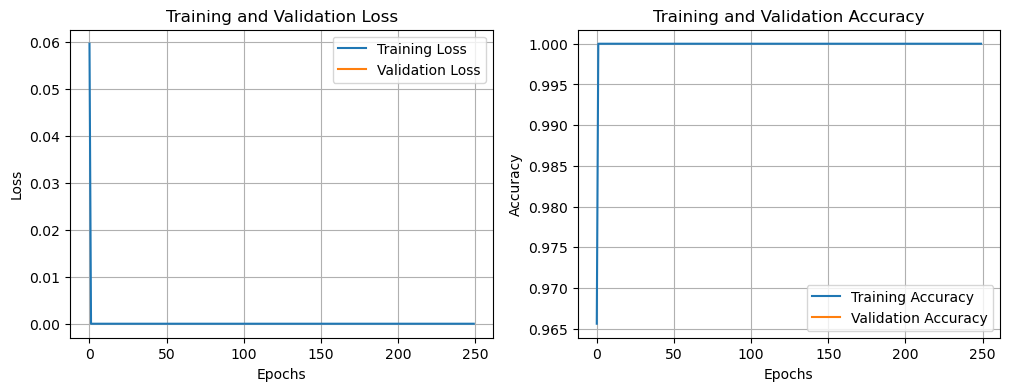

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


6/6 [==============================] - 6s 792ms/step


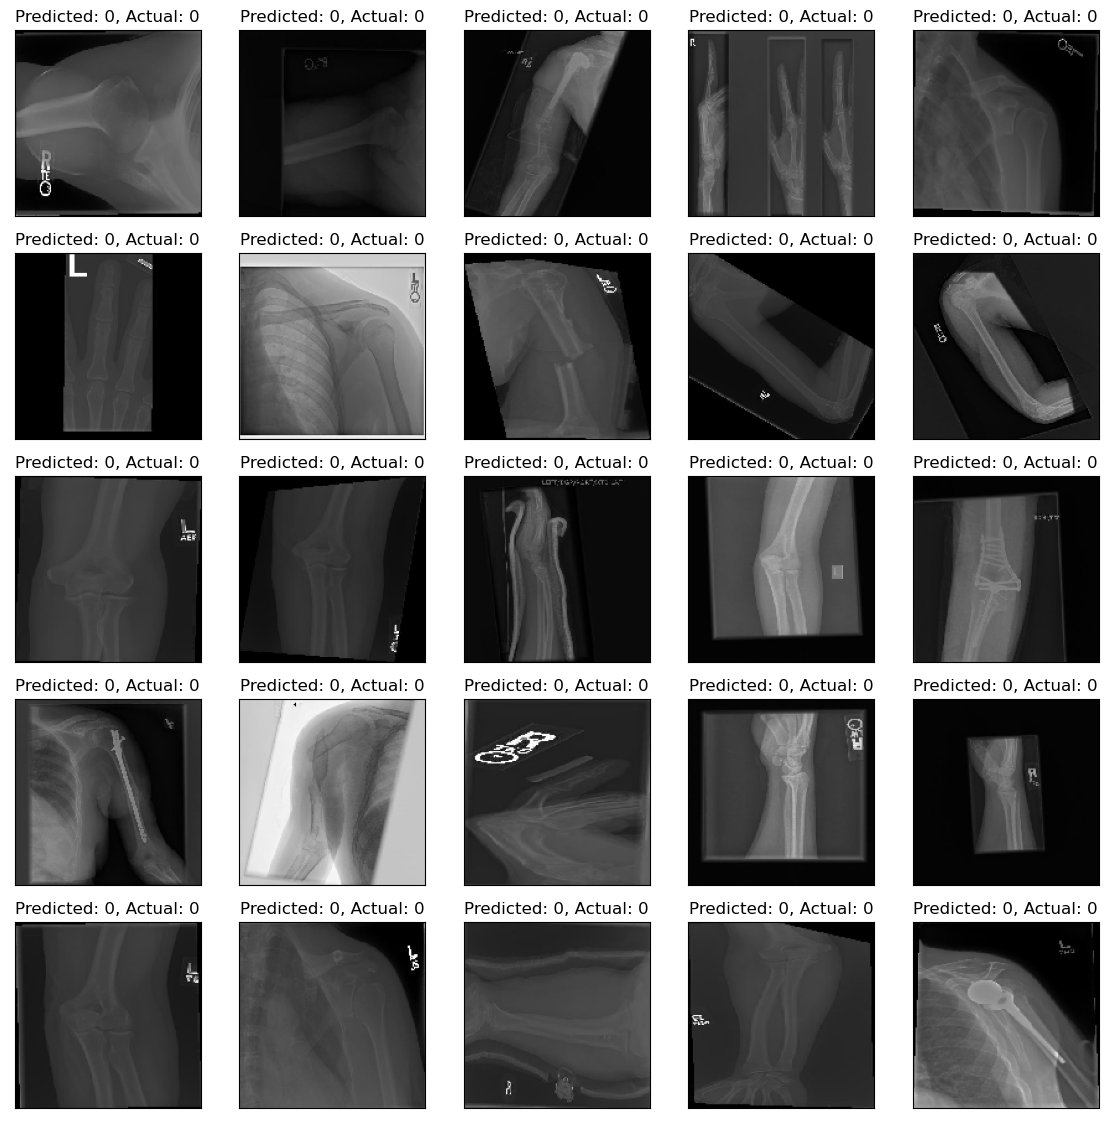

In [21]:
# Initialize lists to store test images and labels
test_images = []
test_labels = []

# Iterate over the test generator to collect test data
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Visualize predictions
plt.figure(figsize=(14, 14))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.title(f'Predicted: {predicted_labels[i]}, Actual: {int(test_labels[i])}')

plt.show()
